## Pre-processing: &thinsp; Relative humidity - hur 

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import seaborn as sns

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

import os
import sys
home = os.path.expanduser("~") + '/Documents'
sys.path.insert(0, '{}/code/phd/functions'.format(home))
from myFuncs import *
%matplotlib inline

# %matplotlib inline
# %matplotlib qt

In [28]:
variable = 'hur'

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

models_cmip6 = [     
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    # 'CESM2',          # 13
    'NESM3'           # 14
    ]

datasets = models_cmip5 + models_cmip6


timescales = [
    # 'daily',
    'monthly'
    ]

experiments =[
    'historical',
    # 'rcp85',
    # 'ssp585'
    ]

resolutions = [
    # 'orig',
    'regridded'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0], timescales[0])
ds

variable:hur, dataset:TaiESM1, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (time: 360, plev: 19, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    hur      (time, plev, lat, lon) float32 ...
Attributes: (12/50)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 0671-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     171550.0
    ...                        ...
    title:                     TaiESM1 output prepared for CMIP6
    variable_id:               hur
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/ac9a4242-a68d-4630-adfe-bdf1e7361392

In [3]:
data = ds['hur']
data

<xarray.DataArray 'hur' (time: 360, plev: 19, lat: 22, lon: 128)>
[19261440 values with dtype=float32]
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative

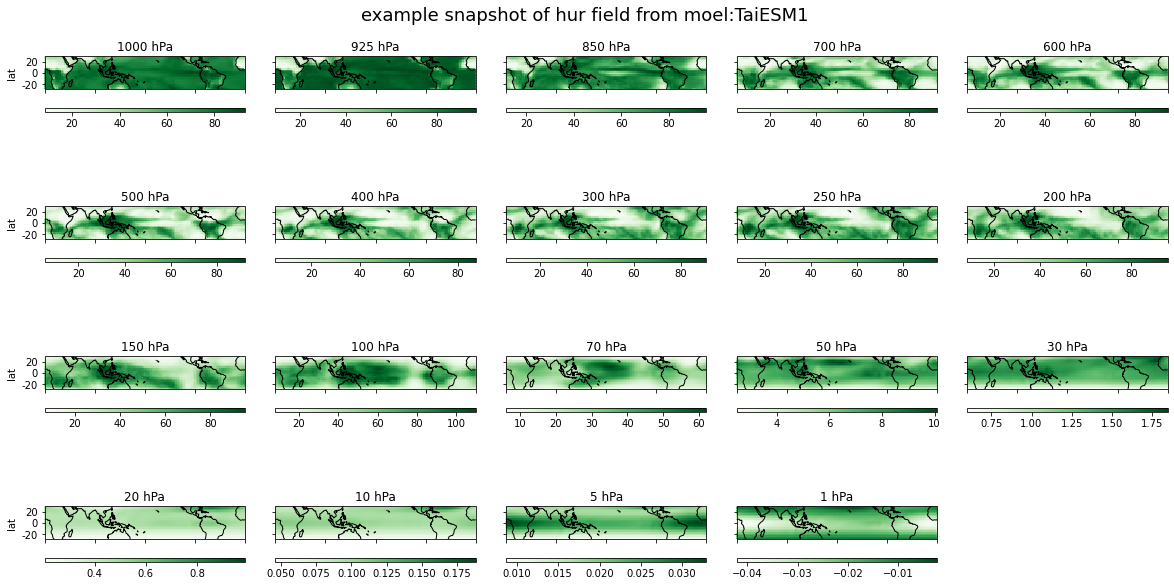

In [6]:
fig= plt.figure(figsize=(20,25))

title = 'example snapshot of {} field from moel:{}'.format(variable, datasets[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6125)
scene = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])[variable].isel(time=0)

for i, plev in enumerate(scene['plev']):
    ax= fig.add_subplot(5,5,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)

    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)


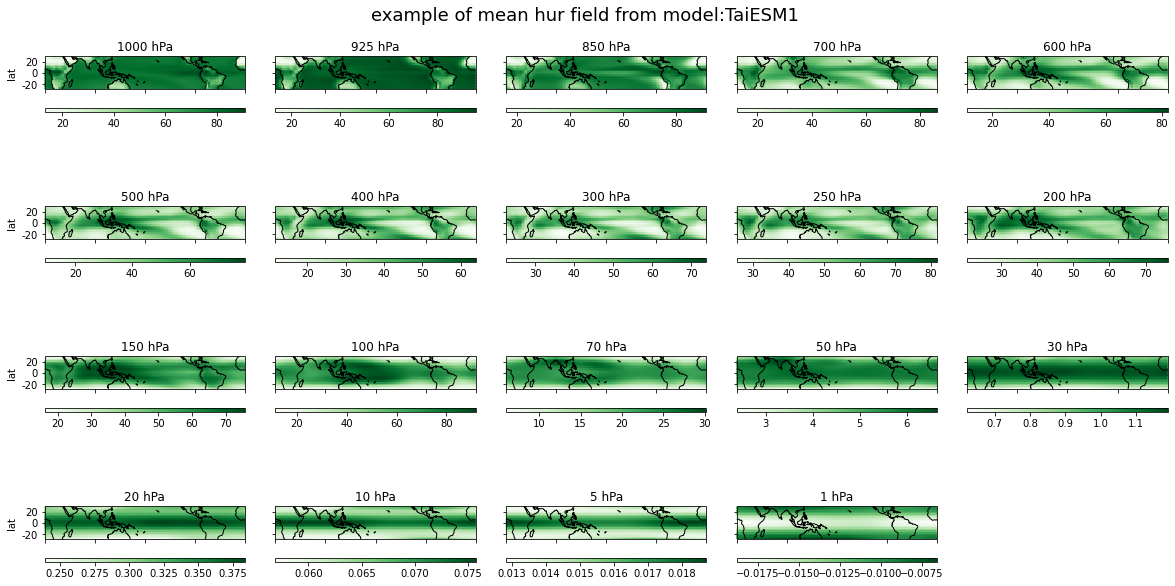

In [7]:
fig= plt.figure(figsize=(20,25))

title = 'example of mean {} field from model:{}'.format(variable, datasets[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6125)
scene = get_dsvariable(variable, datasets[0], experiments[0] ,home, resolutions[0])[variable].mean(dim='time')

for i, plev in enumerate(scene['plev']):
    ax= fig.add_subplot(5,5,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)
        


    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)


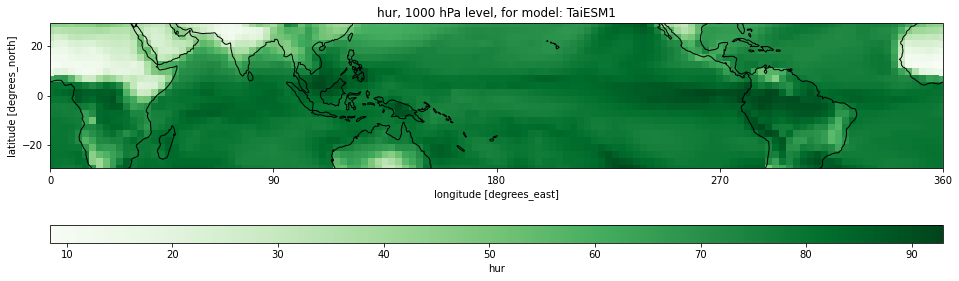

In [9]:
scene = data.isel(time=0).sel(plev = 1000e2)
title = '{}, 1000 hPa level, for model: {}'.format(variable, datasets[0])
cmap = 'Greens'
plot_scene(scene, cmap=cmap, title=title)

In [18]:
data['plev']

<xarray.DataArray 'plev' (plev: 19)>
array([100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,  30000.,
        25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,   2000.,
         1000.,    500.,    100.])
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0

In [15]:
print(data.isel(time=0).sel(plev = 1000e2).isnull().any().data)
print(data.isel(time=0).sel(plev = 1000e2).min().data)
print(data.isel(time=0).sel(plev = 1000e2).max().data)

False
8.425850868225098
92.94857788085938


In [20]:
print(data.isel(time=0).sel(plev = 5e2).isnull().any().data)
print(data.isel(time=0).sel(plev = 5e2).min().data)
print(data.isel(time=0).sel(plev = 5e2).max().data)

False
0.008657819591462612
0.03295299410820007


In [19]:
print(data.isel(time=0).sel(plev = 1e2).isnull().any().data)
print(data.isel(time=0).sel(plev = 1e2).min().data)
print(data.isel(time=0).sel(plev = 1e2).max().data)

False
-0.04213433340191841
-0.002334242919459939


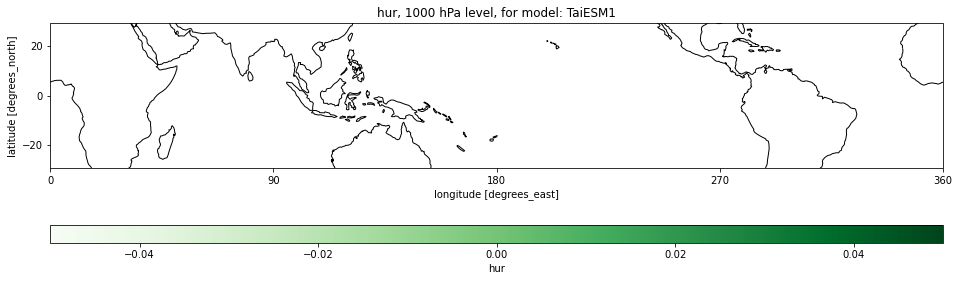

In [23]:
scene = data.isel(time=0).sel(plev = 1e2).where(data.isel(time=0).sel(plev = 1e2)>=0)
title = '{}, 1000 hPa level, for model: {}'.format(variable, datasets[0])
cmap = 'Greens'
plot_scene(scene, cmap=cmap, title=title)

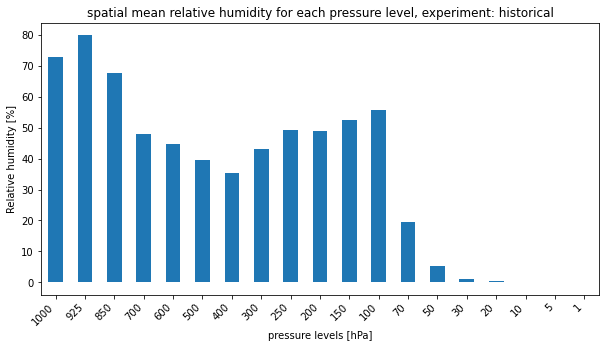

In [16]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(data.lat))
data.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.title('spatial mean relative humidity for each pressure level, experiment: {}'.format(experiments[0]))
plt.ylabel('Relative humidity [%]')
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((data.plev.values/100).astype(int), rotation=45, ha='right')
plt.show()

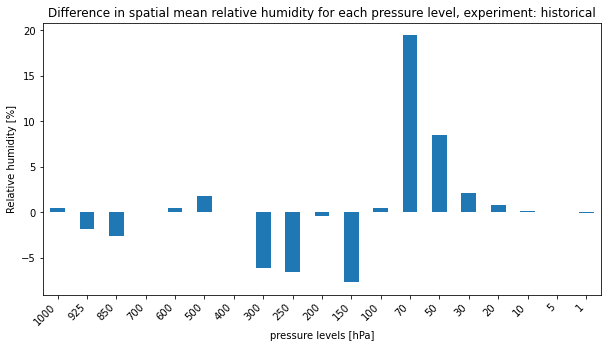

In [17]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))

hur_historical = get_dsvariable(variable, datasets[0], experiment = 'historical', resolution=resolutions[0])['hur']
hur_rcp = get_dsvariable(variable, datasets[0], experiment = 'ssp585', resolution=resolutions[0])['hur']

hur_diff = xr.DataArray(
    data=hur_rcp.data - hur_historical.data,
    dims=['time', 'plev','lat', 'lon'],
    coords={'time':hur_historical.time.data, 'plev':hur_historical.plev.data, 'lat': hur_historical.lat.data, 'lon': hur_historical.lon.data}
    )

hur_diff.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.title('Difference in spatial mean relative humidity for each pressure level, experiment: {}'.format(experiments[0]))
plt.ylabel('Relative humidity [%]')
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((ds['hur'].plev.values/100).astype(int), rotation=45, ha='right')
plt.show()

### comparing datasets

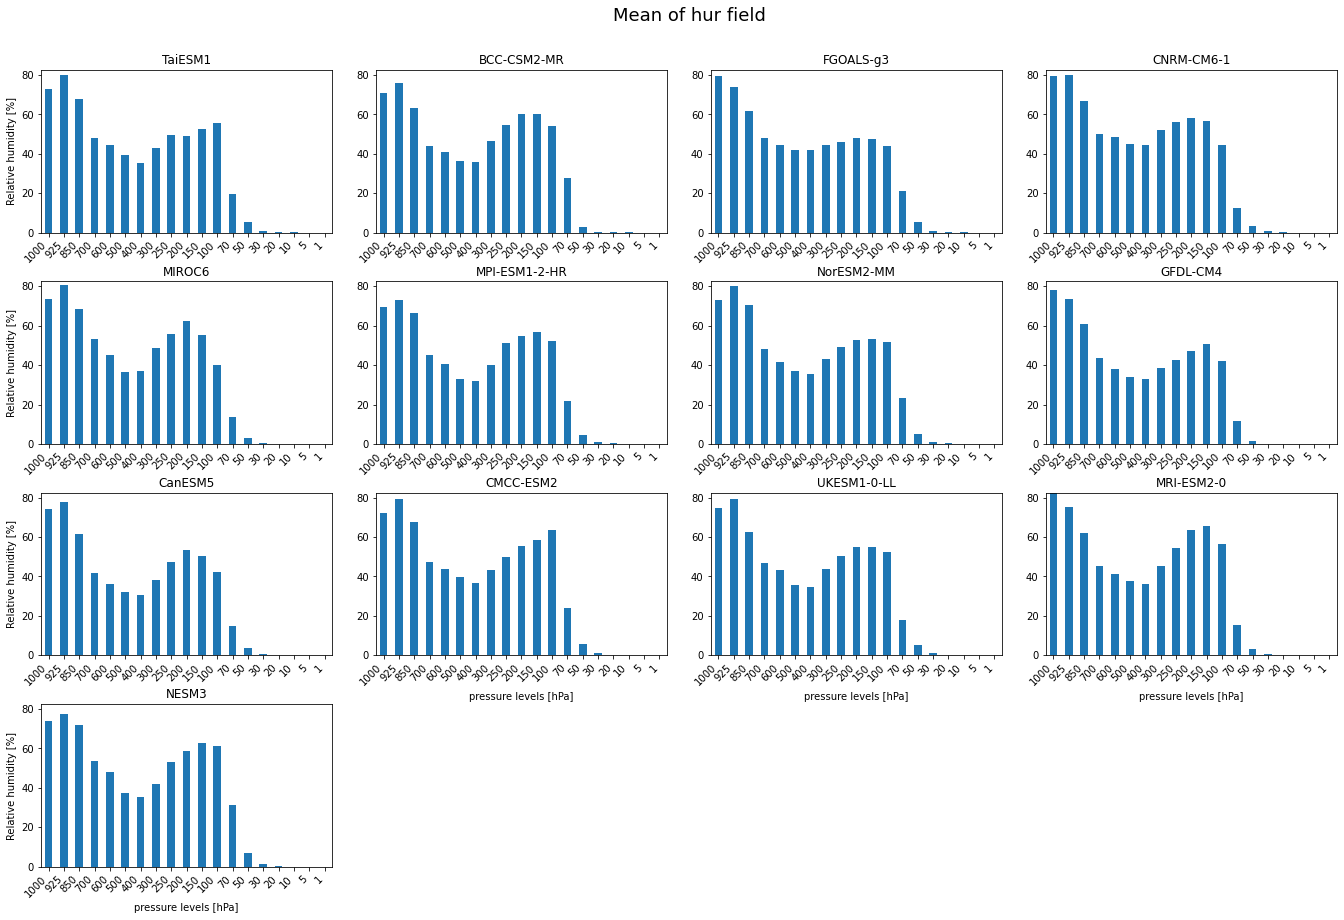

In [29]:
absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hur']
        aWeights = np.cos(np.deg2rad(data.lat))
        data = data.weighted(aWeights).mean(dim=('time','lat','lon'))

        data.attrs['units']= '%'
        y= data

        vmin = np.append(vmin, np.quantile(y.min(), quantile_low))
        vmax = np.append(vmax, np.quantile(y.max(), quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Mean of {} field'.format('hur')

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    
    data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hur']
    aWeights = np.cos(np.deg2rad(data.lat))

    ax= fig.add_subplot(5,4,i+1)
    data.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
    plt.ylim([vmin, vmax])
    plt.title(dataset)

    ax.set_xticklabels((data.plev.values/100).astype(int), rotation=45, ha='right')
    plt.xlabel('')

    if (len(datasets)-i)<=4:
        plt.xlabel('pressure levels [hPa]')

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel('Relative humidity [%]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
plt.show()

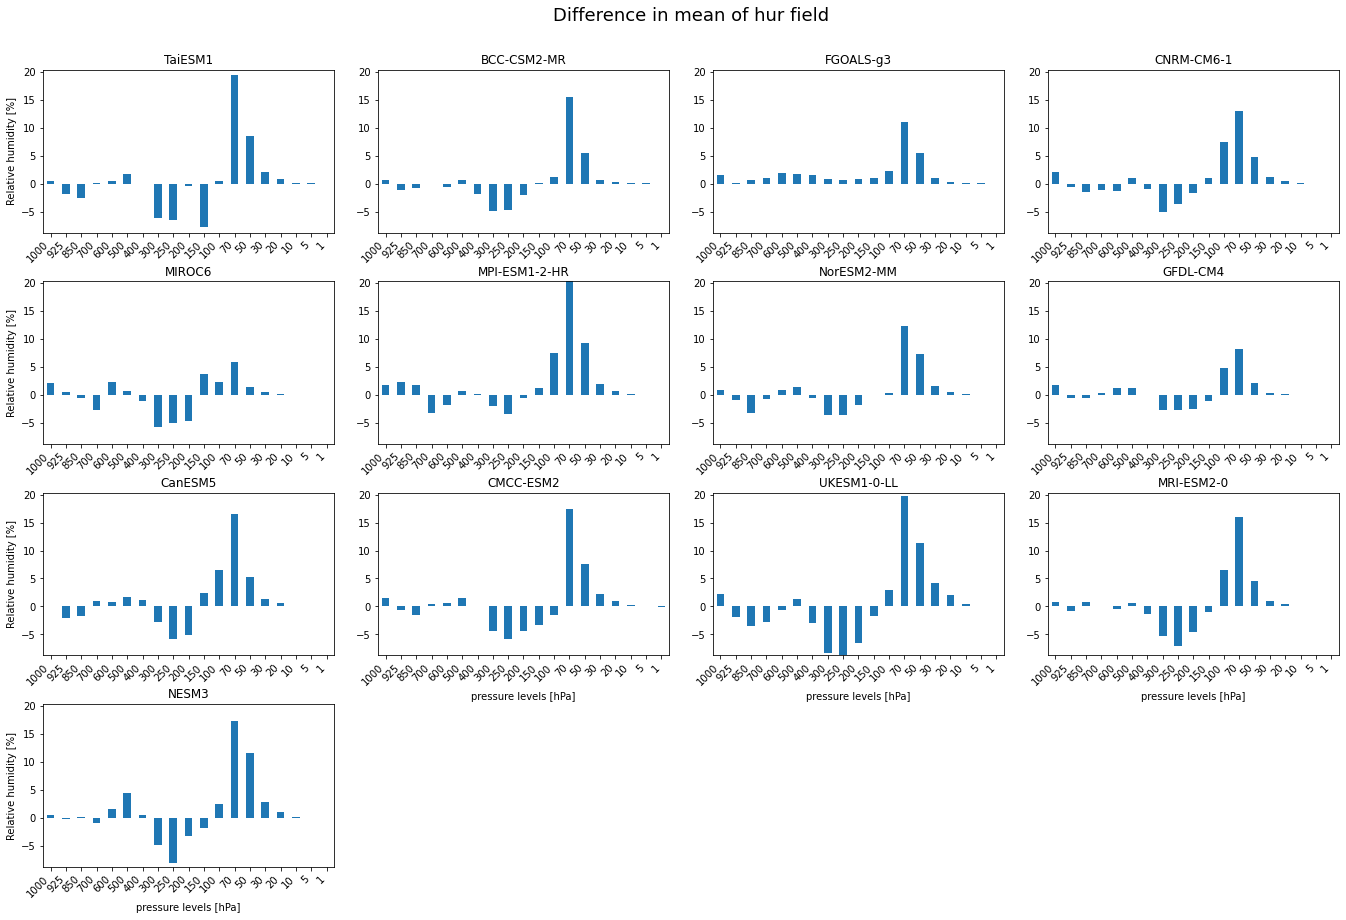

In [31]:
absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        
        data_historical = get_dsvariable(variable, dataset, experiment = 'historical', resolution=resolutions[0])['hur']
        data_rcp = get_dsvariable(variable, dataset, experiment = 'ssp585', resolution=resolutions[0])['hur']

        data_diff = xr.DataArray(
            data=data_rcp.data - data_historical.data,
            dims=['time', 'plev','lat', 'lon'],
            coords={'time':data_historical.time.data, 'plev':data_historical.plev.data, 'lat': data_historical.lat.data, 'lon': data_historical.lon.data}
            )

        aWeights = np.cos(np.deg2rad(data_diff.lat))
        data_diff = data_diff.weighted(aWeights).mean(dim=('time','lat','lon'))
        y= data_diff

        vmin = np.append(vmin, np.quantile(y.min(), quantile_low))
        vmax = np.append(vmax, np.quantile(y.max(), quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Difference in mean of {} field'.format('hur')

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    
    data_historical = get_dsvariable(variable, dataset, experiment = 'historical', resolution=resolutions[0])['hur']
    data_rcp = get_dsvariable(variable, dataset, experiment = 'ssp585', resolution=resolutions[0])['hur']

    data_diff = xr.DataArray(
        data=data_rcp.data - data_historical.data,
        dims=['time', 'plev','lat', 'lon'],
        coords={'time':data_historical.time.data, 'plev':data_historical.plev.data, 'lat': data_historical.lat.data, 'lon': data_historical.lon.data}
        )

    aWeights = np.cos(np.deg2rad(data_diff.lat))

    title = dataset
    ax= fig.add_subplot(5,4,i+1)
    data_diff.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
    plt.ylim([vmin, vmax])
    plt.title(dataset)

    ax.set_xticklabels((data_historical.plev.values/100).astype(int), rotation=45, ha='right')
    plt.xlabel('')

    if (len(datasets)-i)<=4:
        plt.xlabel('pressure levels [hPa]')

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel('Relative humidity [%]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
plt.show()

### Mass-weighted mean
The top vertical level have negative values, so we exclude that level

In [45]:
def massWeighted_mean(hur):
    hur = (hur.sel(plev=slice(1000e2,5e2)) * hur.plev.sel(plev=slice(1000e2,5e2))).sum(dim='plev') / hur.plev.sel(plev=slice(1000e2,5e2)).sum(dim='plev')
    hur.attrs['units']= '%'
    hur.attrs['Description'] = 'weighted mean relative humidity from 1000-5 hpa'
    return hur

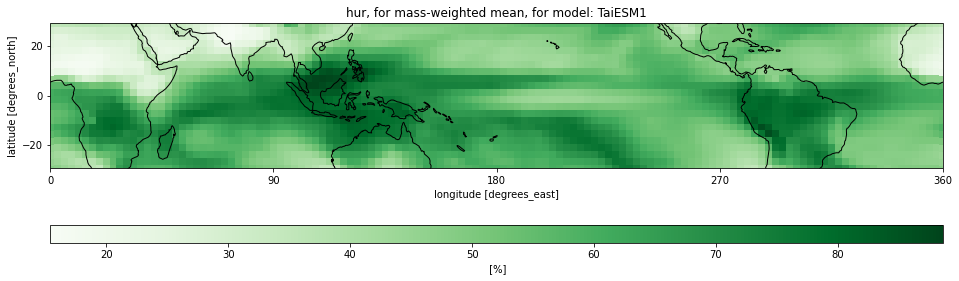

In [46]:
hur = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0], timescales[0])[variable]
hur = massWeighted_mean(hur)
scene = hur.isel(time=0)
title = '{}, for mass-weighted mean, for model: {}'.format(variable, datasets[0])
cmap = 'Greens'
plot_scene(scene, cmap=cmap, title=title)

In [56]:
execute = True
if execute:
    models_cmip5 = [
        # 'IPSL-CM5A-MR', # 1
        # 'GFDL-CM3',     # 2
        # # 'GISS-E2-H',    # 3  no wap data
        # # 'bcc-csm1-1',   # 4  only monthly wap (for rcp)
        # 'CNRM-CM5',     # 5
        # # 'CCSM4',        # 6  only monthly wap
        # # 'HadGEM2-AO',   # 7  only monthly wap
        # 'BNU-ESM',      # 8
        # # 'EC-EARTH',     # 9  no wap data
        # 'FGOALS-g2',    # 10
        # 'MPI-ESM-MR',   # 11
        # 'CMCC-CM',      # 12
        # # 'inmcm4',       # 13 only monthly wap
        # 'NorESM1-M',    # 14
        # 'CanESM2',      # 15
        # 'MIROC5',       # 16
        # # 'HadGEM2-CC',   # 17 no wap data
        # 'MRI-CGCM3',    # 18
        # # 'CESM1-BGC'     # 19 only monthly wap
        ]


    models_cmip6 = [     
        # 'TaiESM1',        # 1
        # 'BCC-CSM2-MR',    # 2
        # 'FGOALS-g3',      # 3
        # 'CNRM-CM6-1',     # 4
        # 'MIROC6',         # 5
        # 'MPI-ESM1-2-HR',  # 6
        # 'NorESM2-MM',     # 7
        # 'GFDL-CM4',       # 8
        # 'CanESM5',        # 9
        # 'CMCC-ESM2',      # 10
        # 'UKESM1-0-LL',    # 11
        # 'MRI-ESM2-0',     # 12
        # 'CESM2',          # 13
        'NESM3'           # 14
        ]


    datasets = models_cmip5 + models_cmip6

    timescale = [
        # 'daily',
        'monthly'
        ]

    resolutions = [
        # 'orig',
        'regridded'
        ]

    experiments =[
        'historical',
        # 'rcp85',
        'ssp585'
        ]

    for dataset in datasets:
        for experiment in experiments:
            data = get_dsvariable(variable, dataset, experiment, home, resolutions[0], timescales[0])[variable]
            data = massWeighted_mean(data)

            ds_hur = xr.Dataset(
                data_vars = {'hur': data},
                attrs = data.attrs
                )

            save_hur = False
            if np.isin(models_cmip5, dataset).any():
                project = 'cmip5'
            elif np.isin(models_cmip6, dataset).any():
                project = 'cmip6'

            folder_save = home + '/data/' + project + '/' + 'ds_' + project + '_' + resolutions[0] + '/' + dataset 
            if save_hur:
                fileName = dataset + '_hur_vMean_' + timescales[0] + '_' + experiment + '_' + resolutions[0] +  '.nc'
                save_file(ds_hur, folder_save, fileName)

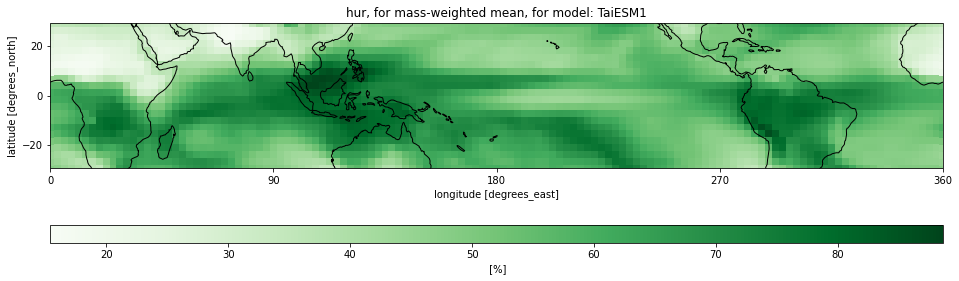

In [50]:
scene = data.isel(time=0)
title = '{}, for mass-weighted mean, for model: {}'.format(variable, datasets[0])
cmap = 'Greens'
plot_scene(scene, cmap=cmap, title=title)

In [52]:
# a = xr.open_dataset('/Users/cbla0002/Documents/data/cmip6/ds_cmip6_regridded/TaiESM1/TaiESM1_hur_vMean_monthly_historical_regridded.nc')
# scene = a['hur'].isel(time=0)
# title = '{}, for mass-weighted mean, for model: {}'.format(variable, datasets[0])
# cmap = 'Greens'
# plot_scene(scene, cmap=cmap, title=title)

<xarray.Dataset>
Dimensions:  (time: 360, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    hur      (time, lat, lon) float64 ...
Attributes:
    units:        %
    Description:  weighted mean relative humidity from 1000-5 hpa